In [7]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

# 1. 결정 트리

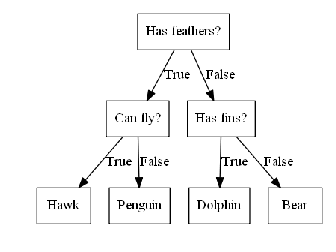

In [3]:
# 결정 트리(decision tree) 용도: 분류, 회귀
# 결정을 위해 예/아니오 질문을 이어 나가면서 학습

# 결정 트리 그래프들 다 안되는 듯
mglearn.plots.plot_animal_tree() 

# 노드: 질문이나 정답을 담은 네모 상자
# 마지막 노드: 리프(leaf)
# 엣지: 질문의 답과 다음 질문을 연결

# 2. 결정 트리 만들기

In [4]:
# two_moons 데이터셋
# 각 클래스별 데이터 포인트 50개씩 2클래스
# 반달 두 개가 포개진 듯한 모양

# 결정 트리를 학습한다 = 정답에 가장 빨리 도달하는 Y/N 질문 목록을 학습한다
# 이런 질문 = 테스트(NOT 테스트 세트)
# 연속적인 데이터에 적용할 테스트 = "특성 i는 값 a보다 큰가?"의 형태

# 트리를 만들 때 알고리즘은 가능한 모든 테스트에서 target값에 대해 가장 많은 정보를
# 가진 것을 고른다.
# 반복된 프로세스는 각 노드가 테스트 하나씩을 가진 이진 결정 트리를 만든다.
# 데이터를 분할하는 것은 각 분할된 영역이(결정 트리의 리프) 
# 한 개의 target값(하나의 클래스 or 하나의 회귀 분석 결과)을 가질 때까지 반복된다.
# 순수 노드(pure node): target 하나로만 이루어진 리프 노드

# 새로운 데이터 포인트에 대한 예측
# 주어진 데이터 포인트가 특성을 분할한 영역들 중 어디에 놓이는지를 확인하면 된다.
# 그래서 그 영역의 target값 중 다수(순수 노드라면 하나)인 것을 예측 결과로 한다.
# 루트 노드에서 시작해 테스트의 결과에 따라 왼쪽 또는 오른쪽으로 트리를 탐색해나가는
# 식으로 영역을 찾을 수 있다.

# 같은 방법으로 회귀 문제에서도 트리 사용 가능
# 예측 시 각 노드의 테스트 결과에 따라 트리를 탐색하고
# 새로운 데이터 포인트에 해당되는 리프 노드를 찾는다.
# 찾은 리프 노드의 training data 평균 값이 이 데이터 포인트의 출력이 된다.

# 3. 결정 트리 복잡도 제어하기

In [12]:
# 일반적으로 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면
# 모델이 매우 복잡해지고 training data에 과대적합된다.
# 순수 노드로 이루어진 트리 = training set에 100% 정확하게 맞는다는 의미
# 즉 training set의 모든 데이터 포인트는 정확한 클래스의 리프 노드에 있다.

# 과대적합을 막는 전략
# 1) 트리 생성을 일찍 중단(사전 가지치기, pre-pruning)
#   - 트리의 최대 깊이나 리프의 최대 개수 제한, 
#     또는 노드가 분할하기 위한 포인트의 최소 개수 지정
# 2) 트리 생성 후 데이터 포인트가 적은 노드 삭제 또는 병합(사후 가지치기, post-pruning
#    또는 가지치기, pruning)

# scikit-learn에서의 결정 트리는 DecisionTreeRegressor, DecisionTreeClassifier에 구현
# scikit-learn은 사전 가지치기만 지원

## 3-1. 기본값 설정의 완전한 트리 모델 만들기

In [13]:
# 학습 데이터셋: 유방암 데이터셋
# 기본값 설정의 완전한 트리(모든 리프 노드가 순수 노드가 될 때까지 생성한 트리)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                             stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(tree.score(X_test, y_test)))


# 모든 리프 노드가 순수 노드이므로 training set 정확도는 100%

training set 정확도: 1.000
test set 정확도: 0.937


## 3-2. 트리에 사전 가지치기 적용

In [14]:
# max_depth=4 옵션을 주어 연속된 질문 최대 4개로 제한

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(tree.score(X_test, y_test)))

# 트리 깊이를 제한하여 과대적합이 줄어듬
# training set의 정확도는 떨어뜨리지만 test set의 성능은 개선시킨다.

training set 정확도: 0.988
test set 정확도: 0.951


# 4. 결정 트리 분석

In [19]:
# export_graphviz() 함수를 이용한 트리 시각화
# 이 함수는 그래프 저장용 텍스트 파일(.dot 파일)을 만듬

from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
               feature_names=cancer.feature_names,
               impurity=False, filled=True) # filled=True는 노드의 클래스 구분

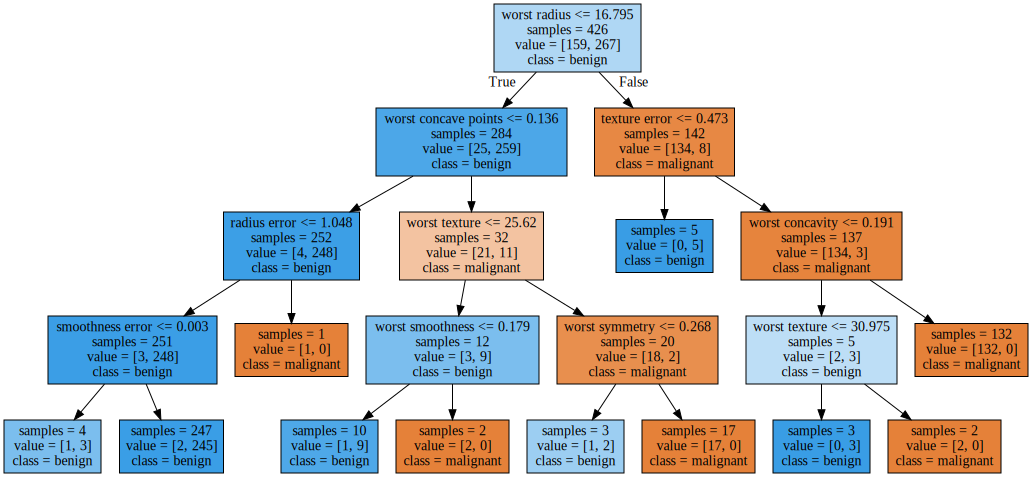

In [20]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# samples: 각 노드에 있는 샘플 수
# value: 클래스 당 샘플 수
# 루트 노드의 왼쪽 가지(worst radius <= 16.795): 악성 샘플 25개, 양성 샘플 259개
# 루트 노드의 오른쪽 가지(worst radius > 16.795): 악성 샘플 134개, 양성 샘플 8개인 노드

# 5. 트리의 특성 중요도

In [21]:
# 가장 널리 사용되는 속성: 특성 중요도(feature importance)
#  - 트리를 만드는 결정에 각 특성이 얼마나 중요한지 평가
#  - 범위: 0 ~ 1
#  - 0: 전혀 사용되지 않음, 1: 완벽하게 target 클래스 예측
#  - 특성 중요도 전체 합: 1

print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


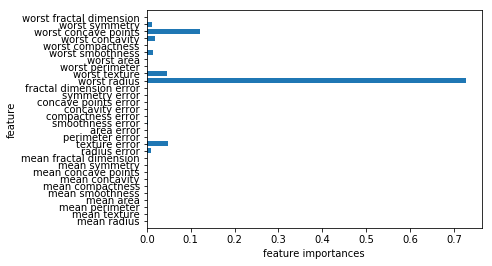

In [26]:
# 특성 중요도 시각화
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)
# 루트 노트에 사용한 특성 worst radius가 가장 중요한 특성으로 나타남
# 그래프는 루트 노드에서 두 클래스를 꽤 잘 나누고 있다는 관찰을 뒷받침해준다.
# feature_importance_가 낮다고 이 특성이 유용하지 않다는 뜻은 아님
# 단지 트리가 그 틍성을 선택하지 않았을 뿐
# 다른 특성이 동일한 정보를 지니고 있어서일 수 있다.

Feature importances: [0. 1.]


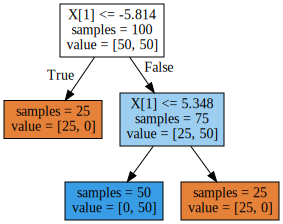

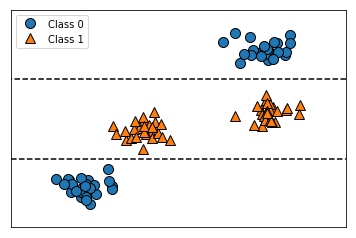

In [27]:
# 특성 중요도는 항상 양수
# 특성이 어떤 클래스를 지지하는지는 알 수 없음
# 즉 특성 중요도 값은 "worst radius"가 중요하다고 알려주지만
# 높은 반지름이 양성을 의미하는지 악성을 의미하는지는 알 수 없다.
# 사실 특성과 클래스 사이에는 간단하지 않은 관계가 있을 수 있다.

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# [트리] y축 특성이 클래스 레이블과 복합적인 관계를 가지고 있는 2차원 데이터셋과
# 결정 트리가 만든 결정 경계
# [그림] 트리에 나타난 데이터로 학습한 결정 트리

# 그림을 보면 2개의 특성, 2개의 클래스를 가진 데이터셋
# X[1]에 있는 정보만 사용되었고, X[0]은 전혀 사용되지 않았다.
# 하지만 X[1]과 출력 클래스와의 관계는 단순하게 비례/반비레 하지 않는다.
# 즉 "X[1]값이 높으면 클래스 0이고 값이 낮으면 1"이라고(또는 그 반대로) 말할 수 없다.

In [28]:
# 위의 분류 결정 트리에 대해 논한 내용은 DecisionTreeRegressor로 구현된 
# 회귀 결정 트리에서도 비슷하게 적용된다.
# 회귀를 위한 트리 기반 모델 사용 시 짚고 넘어가야 할 속성: 외삽(extrapolation)
#  - DecisionTreeRegressor 외 모든 다른 트리 기반 회귀 모델은 외삽,
#    즉 training data 범위 밖의 point에 대해 예측을 할 수 없다.

Text(0,0.5,'price ($/Mbyte)')

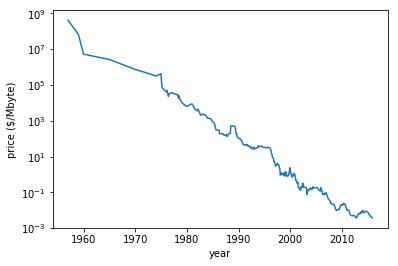

In [32]:
# 학습 데이터셋: 컴퓨터 메모리 가격 동향 데이터셋

import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte)")

# y축: 로그 스케일
# 그래프를 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 비교적
# 예측하기 쉬워진다.

In [41]:
# 날짜 특성만 이용해 2000년 전까지의 데이터로 2000년 후의 가격 예측하기
# 그래프 표현을 위해 전체 데이터셋에 대해 예측하지만
# test set과의 비교가 관심 대상

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000] 
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날자 특성만 이용
X_train = data_train.date[:, np.newaxis]
# 데이터와 target의 관계를 간단하게 만들기 위해 로그 스케일로 변경
y_train = np.log(data_train.price)

# DecisionTreeRegressor와 LinearRegression 비교
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해 수행
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값 로그 스케일을 되돌림
# 로그 스케일이 DecisionTreeRegressor에는 아무런 차이가 없지만
# LinearRegression에는 큰 차이가 있기 때문에
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

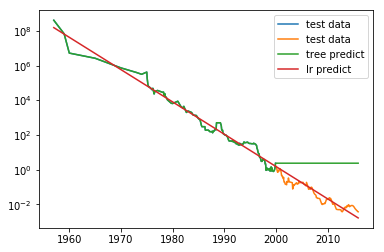

In [44]:
# 실제 값과 결정 트리, 선형 회귀의 예측값 비교
plt.semilogy(data_train.date, data_train.price, label="test data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree predict")
plt.semilogy(ram_prices.date, price_lr, label="lr predict")
plt.legend()

# 선형 모델
#  - training data와 test data에 있는 미세한 굴곡을 매끈하게 근사하여 
#    test data(2000년 이후)를 꽤 정확히 예측
# 트리 모델
#  - training data를 완벽하게 예측(트리의 복잡도에 제한두지 않아서 전체 데이터를 모두
#    기억하기 때문)
#  - 그러나 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 
#    예측하는게 전부
#  - training data 밖의 새로운 데이터를 예측할 능력이 없음
#    이는 모든 트리 기반 모델의 공통된 단점
#  - 트리 기반 모델로 좋은 예측을 만들 수 있지만 시계열 데이터에는 잘 맞지 않는다.

# 6. 장단점과 매개변수

In [ ]:
# 매개변수
# 사전 가지치기 방법 중 max_depth, max_leaf_nodes, min_samples_leaf 중 하나만
# 지정해도 과대적합을 막는데 충분

# max_leaf_nodes: 리프 노드의 최대 개수 지정
# min_samples_leaf: 리프 노드가 되기 위한 최소한의 샘플 개수 지정
# min_samples_split: 노드가 분기할 수 있는 최소 샘플 개수 지정

# 결정 트리가 이전 알고리즘들보다 나은 점
# 1) 쉽게 시각화할 수 있어 비전문가도 이해가 쉬움(비교적 작은 트리일 때)
# 2) 데이터의 스케일에 구애받지 않는다.
#  - 각 특성이 개별적으로 처리되어 데이터를 분할하는데 데이터 스케일의 영향을 받지
#    않으므로 특성의 정규화, 표준화 같은 저처리 과정 필요 없음
# 3) 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도
#    잘 작동

# 단점
# 1) 사전 가지치기를 사용해도 과대적합되는 경향이 있어 일반화 성능이 좋지 않다.
# * 대안: 앙상블